DATA PREPARATION

1. LOAD THE CSV FILE

In [5]:
import pandas as pd

# Specify encoding and handle errors while reading CSV
try:
    df = pd.read_csv('Online Retail.csv', encoding='utf-8')
except UnicodeDecodeError:
    print("UnicodeDecodeError: Encountered encoding issue. Trying 'latin-1'...")
    df = pd.read_csv('Online Retail.csv', encoding='latin-1')



UnicodeDecodeError: Encountered encoding issue. Trying 'latin-1'...


 2. UNDERSTAND THE DATA

In [14]:
# First 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom


In [15]:
# Basic information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [16]:
# Summary statistics for numerical columns
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
# no. of rows and columns
df.shape

(541909, 8)

In [17]:

# Check for missing values
 df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

3. CLEAN THE DATA

In [21]:
#Handle missing values by dropping
df.dropna(inplace=True)

In [22]:
# Check for duplicates
print("Duplicate entries:", df.duplicated().sum())


Duplicate entries: 0


There is no any duplicate entries, so we don't need to remove.

Convert datatypes

In [42]:
# InvoiceDate object datatype to datetime datatype
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

4. TRANSFORM THE DATA


In [24]:
# Example: Normalize 'UnitPrice' column using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['UnitPrice_Normalized'] = scaler.fit_transform(df[['UnitPrice']])


Encoding the categorical columns

In [29]:
import seaborn as sns



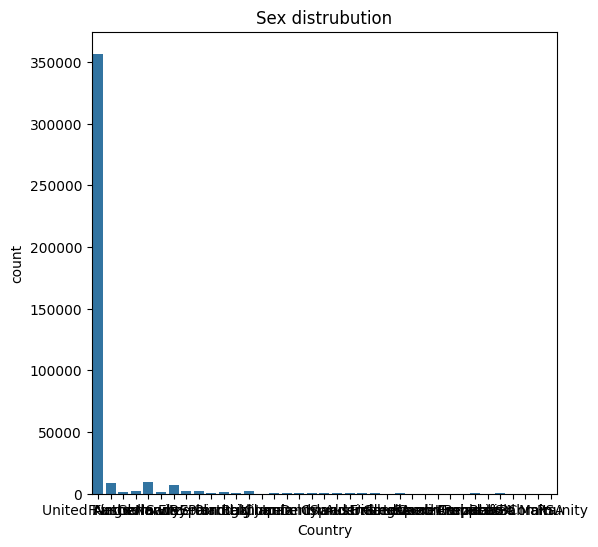

In [30]:
# for gender column
plt.figure(figsize=(6,6))
sns.countplot(x = 'Country',data=df)
plt.title('Sex distrubution')
plt.show()

In [31]:
df['Country'].value_counts()

Country
United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


we can't encode any columns because there are too many categories to encoded.

5. FEATURE ENGINEERING


Create New Features

In [47]:
# Create new features
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['InvoiceHour'] = df['InvoiceDate'].dt.hour
df['InvoiceDayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['IsWeekend'] = df['InvoiceDayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df['IsHighValue'] = df['TotalPrice'].apply(lambda x: 1 if x > 50 else 0)
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceYear'] = df['InvoiceDate'].dt.year

In [48]:
# Display the first few rows to see the new features
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   UnitPrice_Normalized  InvoiceMonth  InvoiceYear  TotalPrice  InvoiceHour  \
0              0.000065            12         2010       15.30            8   
1              0.000087 

Feature selection 


We will use a Random Forest model to identify the most important features.

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

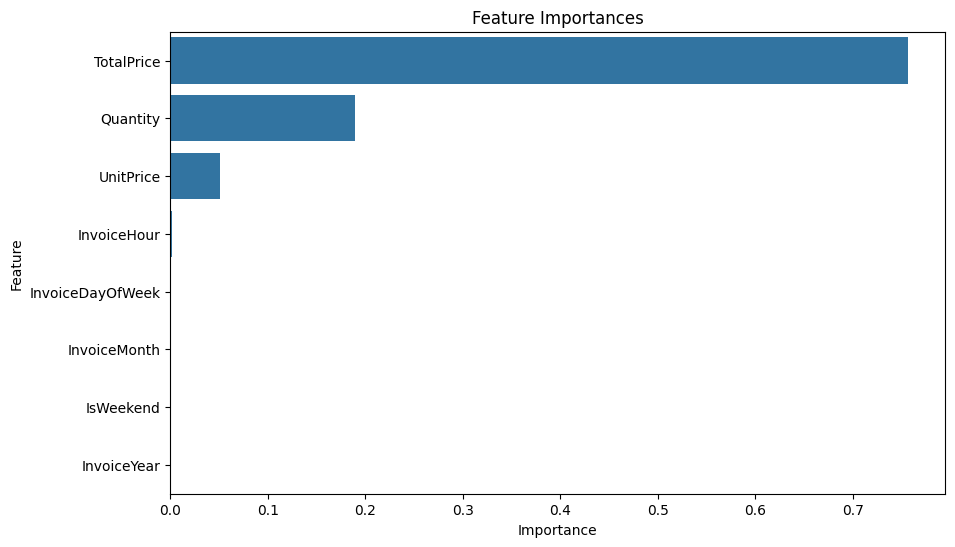

            Feature  Importance
2        TotalPrice    0.756977
0          Quantity    0.188850
1         UnitPrice    0.050797
3       InvoiceHour    0.001749
4  InvoiceDayOfWeek    0.000646
6      InvoiceMonth    0.000478
5         IsWeekend    0.000438
7       InvoiceYear    0.000065


In [50]:
# Select features and target variable
features = ['Quantity', 'UnitPrice', 'TotalPrice', 'InvoiceHour', 'InvoiceDayOfWeek', 'IsWeekend', 'InvoiceMonth', 'InvoiceYear']
X = df[features]
y = df['IsHighValue']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# Print the feature importances
print(feature_importances)